## Нагадування по Markdown

Надаємо невелике нагадування записів в
[Markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb) (LaTeX):

Markdown | Preview
--- | ---
`**bold text**` | **bold text**
 \\$\frac{x}{y}\\$ | $\frac{x}{y}$
 \\$p^{x}_{y}\\$ | $p^{x}_{y}$
\\$x \cdot y\\$ | $x \cdot y$
\\$\sqrt{x}\\$ | $\sqrt{x}$
\\$\pi\\$ | $\pi$
\\$\approx\\$ | $\approx$

І ще декілька прикладів:

```markdown
$y=x^2$

$e^{i\pi} + 1 = 0$

$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$

$\frac{n!}{k!(n-k)!} = {n \choose k}$

$A_{m,n} =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}$
```

$y=x^2$

$e^{i\pi} + 1 = 0$

$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$

$\frac{n!}{k!(n-k)!} = {n \choose k}$

$A_{m,n} =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}$

 ---

## Завдання 1

В партії з 50 деталей 5 нестандартних. Визнач ймовірність того, що серед обраних навмання для перевірки шести деталей дві виявляться нестандартними. Розв'яжи аналітично.

Примітка: в даній задачі не потрібно рахувати конкретне число.

---
Розв'язання:



N = 50  всього деталей

K = 5    нестандартних деталей

n = 6  обрано

k = 2  кількість  нестандартих в обраних

P($C^{k}_{n}$) = $\frac{C^{k}_{K} * C^{n - k}_{N-K}}{C^{n}_{N}}$ = $\frac{C^{2}_{5} * C^{4}_{45}}{C^{6}_{50}}$ = $\frac{5!}{2! * (5-2)!}$ * $\frac{45!}{4! * (45-4)!}$ * $\frac{6! * (50 - 6)!}{50!}$ = 0,0938 (або 9,38%)

P(X = 0) = 0.5126
P(X = 1) = 0.3844
P(X = 2) = 0.0938
P(X = 3) = 0.0089
P(X = 4) = 0.0003
P(X = 5) = 0.0000


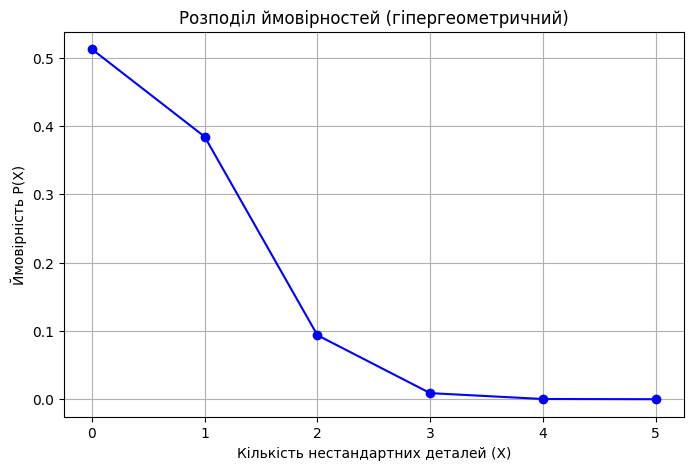

In [1]:
from math import comb
import matplotlib.pyplot as plt

# Параметри
N = 50      # загальна кількість деталей
K = 5       # нестандартних деталей
n = 6       # вибираємо 6 деталей

# Розрахунок ймовірностей для X = 0,1,2,...,min(K,n)
x_vals = list(range(0, min(K, n) + 1))
probabilities = []

for k in x_vals:
    p = comb(K, k) * comb(N - K, n - k) / comb(N, n)
    probabilities.append(p)

# Вивід ймовірностей у консоль
for x, p in zip(x_vals, probabilities):
    print(f"P(X = {x}) = {p:.4f}")

# Побудова графіку
plt.figure(figsize=(8, 5))
plt.plot(x_vals, probabilities, marker='o', linestyle='-', color='blue')
plt.title("Розподіл ймовірностей (гіпергеометричний)")
plt.xlabel("Кількість нестандартних деталей (X)")
plt.ylabel("Ймовірність P(X)")
plt.grid(True)
plt.xticks(x_vals)
plt.show()

## Завдання 2

В тирі стрілець проводить 7 пострілів по мішені з ймовірністю влучання кожного 0.8. Яка ймовірність того, що буде не менше за 5 влучань? Розв'яжи аналітично.

---
Розв'язання:

n = 7        кількість пострілів

p = 0.8      ймовірність влучання

q = 1 - p    ймовірність промаху

P(x >= 5) = P(5) + P(6) + p(7)

P(5) = $C^{5}_{7}$ * $0.8^5$ * $0.2^{7-5}$ = $\frac{7!}{5! * (7-5)!}$ * 0.32768  * 0.04 = 0.2753

P(6) =  $C^{6}_{7}$ * $0.8^6$ * $0.2^{7-6}$ = $\frac{7!}{6! * (7-6)!}$ * 0.26214  * 0.2 = 0.3670

P(7) =  $C^{7}_{7}$ * $0.8^7$ * $0.2^{7-7}$ = 1 * 0.02097  * 1 = 0.2017

P(x >= 5) = P(5) + P(6) + p(7) = 0.2753 + 0.3670 + 0.2017 = 0.8520 (або 85.2%)

Ймовірність того, що буде не менше 5 влучань: 0.8520


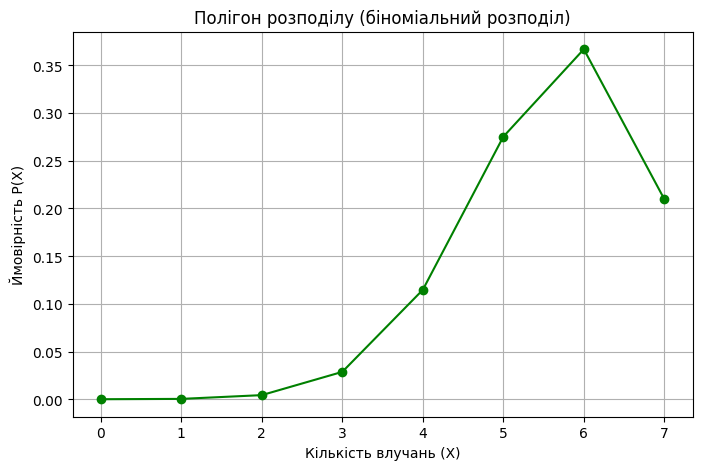

In [2]:
from math import comb
import matplotlib.pyplot as plt

# Параметри задачі
n = 7        # кількість пострілів
p = 0.8      # ймовірність влучання
q = 1 - p    # ймовірність промаху

# Обчислення ймовірностей для X = 0...7
x_vals = list(range(n + 1))
probabilities = []

for k in x_vals:
    P = comb(n, k) * (p ** k) * (q ** (n - k))
    probabilities.append(P)

# Ймовірність X ≥ 5
p_ge_5 = sum(probabilities[5:])
print(f"Ймовірність того, що буде не менше 5 влучань: {p_ge_5:.4f}")

# Побудова полігону розподілу
plt.figure(figsize=(8, 5))
plt.plot(x_vals, probabilities, marker='o', linestyle='-', color='green')
plt.title("Полігон розподілу (біноміальний розподіл)")
plt.xlabel("Кількість влучань (X)")
plt.ylabel("Ймовірність P(X)")
plt.grid(True)
plt.xticks(x_vals)
plt.show()

## Завдання 3

Підкидають три гральні кубики. Що ймовірніше: отримати в сумі очок, що випали, 11 або 12?  
Розв'яжи програмно, згенерувавши всі можливі комбінації.

---
Розв'язання:

Можливість результатів:

всього варіантів 6 * 6 * 6 = 216

27 комбінацій, щоб випало 11
25 комбінацій, щоб випало 12

P(11) = 27 / 216 = 0.125

P(12) = 25 / 216 = 0.1157


In [3]:
from itertools import product

# Усі можливі комбінації для 3 кубиків (1..6)
all_combinations = list(product(range(1, 7), repeat=3))

# Підрахунок кількості сум
sum_11 = 0
sum_12 = 0

for combo in all_combinations:
    total = sum(combo)
    if total == 11:
        sum_11 += 1
    elif total == 12:
        sum_12 += 1

# Вивід результатів
total_combinations = len(all_combinations)
prob_11 = sum_11 / total_combinations
prob_12 = sum_12 / total_combinations

print(f"Загальна кількість комбінацій: {total_combinations}")
print(f"Кількість комбінацій із сумою 11: {sum_11}, ймовірність: {prob_11:.4f}")
print(f"Кількість комбінацій із сумою 12: {sum_12}, ймовірність: {prob_12:.4f}")

if sum_11 > sum_12:
    print("Сума 11 імовірніша за суму 12.")
else:
    print("Сума 12 імовірніша або дорівнює сумі 11.")

Загальна кількість комбінацій: 216
Кількість комбінацій із сумою 11: 27, ймовірність: 0.1250
Кількість комбінацій із сумою 12: 25, ймовірність: 0.1157
▶️ Сума 11 імовірніша за суму 12.


## Завдання 4

Схема електричного ланцюга наведена на рисунку. Через
ділянку схеми, що вийшла з ладу, струм не проходить. Нехай подія
$A_i$ – вихід з ладу елемента $i$ , $i = \overline{1,6}$
. Вирази події $A$ й $\overline{A}$
через події $A_i$, якщо $A$ – вихід з ладу всієї схеми. Розв'яжи аналітично.

Примітка: виразити необхідно через події, а не їх ймовірності.



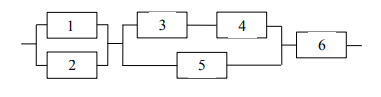

Розв'язання:

Паралельні комбінації:

$A_1 ∧ A_2$

$[(A_4 ∨ A_3) ∧ A_5]$

Схема вийшла з ладу:

A = ($A_1 ∧ A_2$) ∨ [($A_4 ∨ A_3) ∧ A_5] ∨ A_6$

Схема працює:

$\vec{A} = (\vec{A_1} ∨ \vec{A_2}) ∧ [(\vec{A_3} ∧ \vec{A_4}) ∨ \vec{A_5}] ∧ \vec{A_6} $

## Завдання 5

На площині накреслені дві концентричні окружності (мають спільний центр),
радіуси яких 5 і 10 см відповідно. Знайди ймовірність того, що точка, кинута навмання у велике коло, потрапить також у кільце, утворене побудованими окружностями.

Розв'яжи аналітично.

---
Розв'язання:

$S_b = π 10^2 = π100$

$S_s = π 5^2 = π25$

$S_{b-s} = π100 - π25 = π75$

Ймовірність потрапляння в кільце: $\frac{π75}{π100}$ = 0.75 (або 75%)

## Завдання 6
Урна містить одну кулю, про яку відомо, що вона або біла, або чорна з однаковими ймовірностями. В урну кладуть білу кулю і потім навмання виймають одну кулю. Вона виявилася білою. Яка ймовірність того, що куля, яка залишилася, є білою? Розв'яжи аналітично  

---
Розв'язання:

$H_1$ = 0.5 - початкова куля була біла

$H_2$ = 0.5 - початкова куля була чорна

$E$ - витягнута біла куля

$P(E) = p(E|H_1) * P(H_1) + P(E|H_2) * P(H_2)$ = 1 * 0.5 + 0.5 * 0.5 = 0.75

$P(H_1|E) = \frac{P(E|H_1)*P(H_1)}{P(E)}$ = 0.5/0.75 = 0.666667


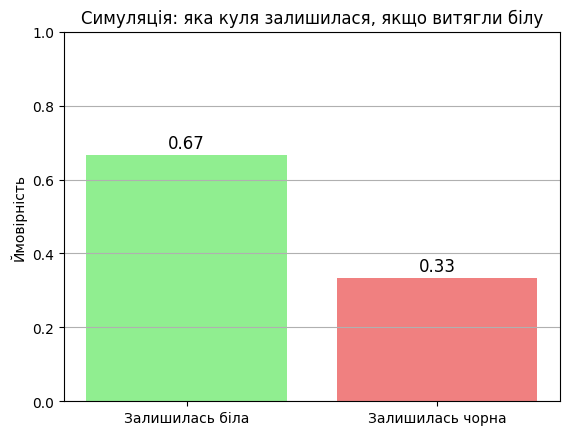

In [4]:
import matplotlib.pyplot as plt
import numpy as np

n_trials = 100_000
remaining_white_count = 0
accepted_trials = 0

for _ in range(n_trials):
    initial_ball = np.random.choice(['white', 'black'])
    balls = ['white', initial_ball]
    drawn_ball = np.random.choice(balls)

    if drawn_ball == 'white':
        accepted_trials += 1
        balls.remove('white')
        if balls[0] == 'white':
            remaining_white_count += 1

simulated_probability = remaining_white_count / accepted_trials

# Побудова графіка
labels = ['Залишилась біла', 'Залишилась чорна']
probs = [simulated_probability, 1 - simulated_probability]

fig, ax = plt.subplots()
bars = ax.bar(labels, probs, color=['lightgreen', 'lightcoral'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points', ha='center', fontsize=12)

ax.set_ylim(0, 1)
ax.set_ylabel('Ймовірність')
ax.set_title('Симуляція: яка куля залишилася, якщо витягли білу')
plt.grid(axis='y')
plt.show()

## Завдання 7. Випадкове блукання
Ціна акцій компанії в кожен момент часу може з рівною ймовірністю збільшитись на 2 або зменшитись на 1. В початковий момент часу $t=0$ ціна рівна 0. Визнач середню ціну акції через 3 одиниці часу ($t=3$).  
а) Виріши аналітично.

б) Напиши симуляцію данного процесу. Порахуй середнє значення та намалюй гістограму ціни для 10, 100, 1000 та 10000 симуляцій.

---
Розв'язання:

$X_0 = 0$

Кожен крок:

p = 0.5 - ціна збільшується на 2

q = 0.5 - ціна зменьшується на 1

Математичне сподівання одного кроку:

$E(x) = 0.5 * 2 + 0.5 * (-1) = 0.5$

Математичне сподівання трьох кроків:

$E(x_3) = E[x_0] + 3 * E(x) = 0 + 3 * 0.5 = 1.5$

ВІдповідь; середнє значення ціни через 3 одиниці часу = 1.5

Симуляцій: 10, Середнє значення: 1.2000


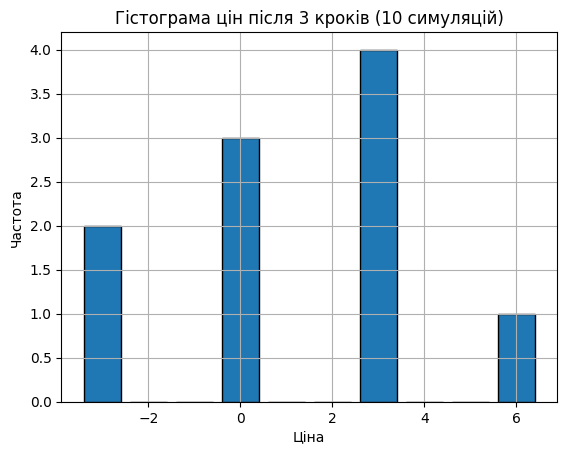

Симуляцій: 100, Середнє значення: 1.2000


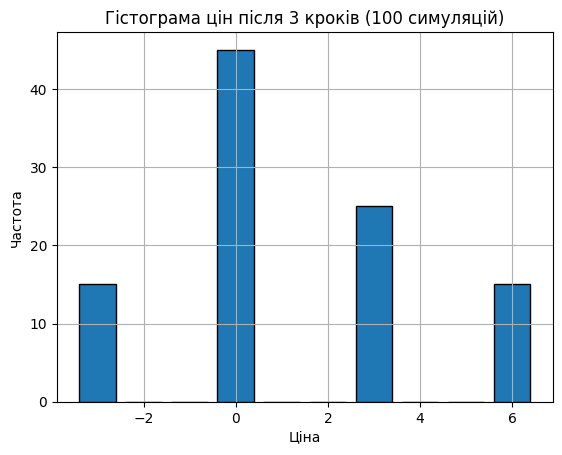

Симуляцій: 1000, Середнє значення: 1.4520


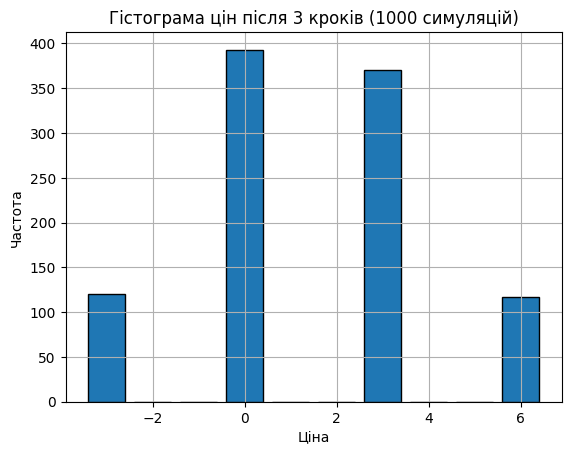

Симуляцій: 10000, Середнє значення: 1.4598


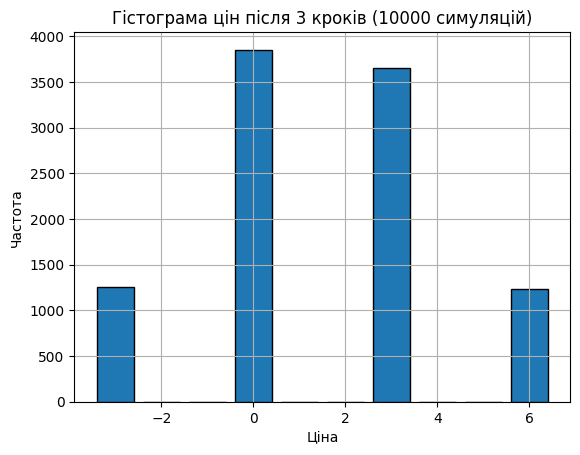

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_n_times(n: int, t: int = 3) -> list:
  outcomes = np.random.choice([2, -1], size=(n, t))
  final_prices = outcomes.sum(axis=1)
  return final_prices

for n in [10, 100, 1000, 10000]:
    results = simulate_n_times(n)
    mean_price = np.mean(results)
    print(f"Симуляцій: {n}, Середнє значення: {mean_price:.4f}")

    plt.hist(results, bins=range(min(results), max(results) + 2), align='left', rwidth=0.8, edgecolor='black')
    plt.title(f'Гістограма цін після 3 кроків ({n} симуляцій)')
    plt.xlabel('Ціна')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()